<a href="https://colab.research.google.com/github/yuji-sgs/media-optimization/blob/main/CTA_improvement.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# 必要なモジュールの読み込み
import numpy as np
from matplotlib import pyplot as plt
import pymc as pm
plt.style.use('grayscale')
plt.style.use('seaborn-whitegrid')
np.random.seed(0)

<ipython-input-1-e7cb73c55926>:6: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')


# 表示回数に対するクリック数の事後分布の可視化＆定量的評価

In [2]:
N = 40  # 表示数(仮)
a = 2   # クリック数（仮）

with pm.Model() as model:
  theta = pm.Uniform('theta', lower=0, upper=1)
  obs = pm.Binomial('a', p=theta, n=N, observed=a)
  trace = pm.sample(5000, chains=2)

/usr/local/lib/python3.10/dist-packages/arviz/utils.py:184: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  numba_fn = numba.jit(**self.kwargs)(self.function)


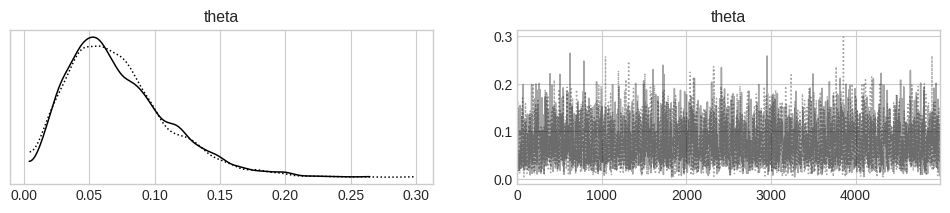

In [3]:
# 事後分布からのサンプルの可視化
with model:
  pm.plot_trace(trace)

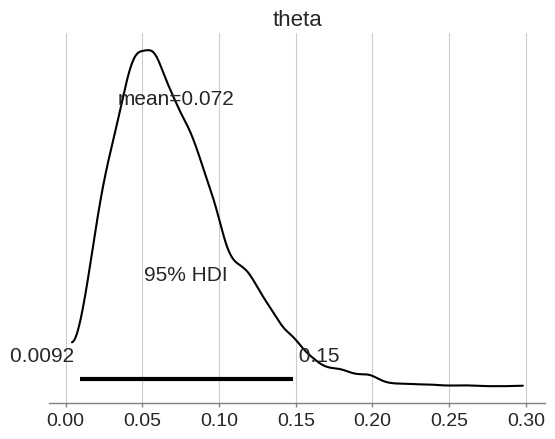

In [4]:
with model:
  pm.plot_posterior(trace, hdi_prob=0.95)

In [7]:
# 仮説：表示数に対するクリック率は1％以上である。
# 定量的評価：新たな確率変数𝛿=θ-0.01のサンプルが95%の確率で正になる。
theta_samples = trace.posterior['theta'].values.flatten()
print((theta_samples - 0.01 > 0).mean())

0.9924
